## MobSys Lab 1: LTE and 5G-SA Advanced

Navid Nikaein, Alireza Mohammadi, Chieh-Chun Chen, and Zaineb Benamar
2023-2024

### 2 Background

For doing this lab you need to be familiar with the following three concepts: 

1. Absolute Radio Frequency Channel Number (ARFCN)
2. TDD Pattern
3. Radio Bearers and Logical Channels

#### 2.1 Absolute Radio Frequency Channel Number (ARFCN)

ARFCN is a term commonly used in mobile communication systems to uniquely identify a specific carrier frequency or within a frequency band. It is important for frequency planning, channel allocation, and communication between mobile devices and base stations. Term ARFCN started from the GSM and evolved with the new technologies like UARFCN for UMTS/WCDMA, named EARFCN for E-UTRA/LTE and now renamed as NR-ARFCN for 5G/NR.

ARFCNs are like numbered parking spots. The center frequency of a carrier is like the parking lot, and the frequency grid spacing is the distance between spots. In the context of Frequency Division Duplexing (FDD), distinct ARFCN values are allocated for the downlink and uplink directions due to their differing frequencies. Equivalently, the offset with respect to the downlink ARFCN could be used to identify the uplink ARFCN. By default, the UL ARFCN is exactly lower than the DL ARFCN by the value of the bandwidth. However, in the Time Division Duplexing (TDD) system, a singular ARFCN value is sufficient as the downlink and uplink frequencies coincide.

To convert the ARFCN and frequency values in MHz to each other, the equations (1) and (2) are used, where $N$is the ARFCN value, $f$ is the frequency in MHz, $f_{off}$ is the frequency offset in MHz, $N_{off}$ is the ARFCN offset, and $\Delta$ is the frequency grid spacing in kHz. The values of $f_{off}$, $N_{off}$, and $\Delta$ depend on the frequency range as given in the table 1.

$$f = f_{off} + \Delta ( N − N_{off}) \qquad \qquad \qquad (1)$$

$$ N = N_{off} + \frac{f − f_{off}}{∆}  \qquad \qquad \qquad (2)$$

<table border="1">
    <thead>
        <tr>
            <th>Frequency Range</th>
            <th>∆</th>
            <th>foff​</th>
            <th>Noff</th>
            <th>Range of N</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>0–3000MHz</td>
            <td>5kHz</td>
            <td>0MHz</td>
            <td>0</td>
            <td>0–599999</td>
        </tr>
        <tr>
            <td>3000 – 24250 MHz </td>
            <td>15 kHz </td>
            <td>3000 MHz </td>
            <td>600000 </td>
            <td>600000 – 2016666</td>
        </tr>
        <tr>
            <td>24250 – 10000 MHz</td>
            <td>60 kHz </td>
            <td>24250 MHz </td>
            <td>2016667 </td>
            <td>2016667 – 3279167</td>
        </tr>
    </tbody>
</table>

$$\text{ Table 1: ARFCN offsets and constants for different frequency ranges. }$$

---

$$
\color{Red}\text{ Important Note: } \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad
$$

$$\color{Red}\text{ While choosing the frequencies for the next lab exercises, you have to make sure that }  \qquad \qquad \qquad \qquad \qquad \qquad  \qquad$$

$$\color{Red}\text{ the chosen frequencies are divisible by the frequency grid spacing ∆ and the subcarrier spacing used. } \qquad \qquad \qquad \qquad \qquad$$

---

#### 2.2 TDD and TDD Pattern

In modern wireless communication systems like 5G, the efficient utilization of available resources is essential to ensure reliable and high-speed data transmission. One key aspect of achieving this efficiency is the concept of Time Division Duplexing (TDD). TDD is a fundamental technique that enables simultaneous uplink (UL) and downlink (DL) communi- cation on the same frequency band, albeit at different time intervals. This method plays a crucial role in optimizing the capacity and performance of 5G networks.

TDD offers several advantages in 5G networks:

• `Full-DuplexPotential`: While it’s challenging for a single radio to simultaneously transmit and receive on the same frequency, TDD overcomes this challenge by allocating separate time slots for transmission and reception.

• `Flexibility`: TDD’s dynamic adaptation allows network operators to optimize resource allocation based on varying demands This flexibility is crucial for meeting diverse application requirements.

• `Efficiency`: By efficiently utilizing the same frequency band for both UL and DL communication, TDD optimizes the overall network capacity and data rates.

LTE uses a set of fixed TDD patterns, defined by the 3GPP standard, while NR provides a flexible way of configuring the DL and UL resources. The parameters used to define a custom TDD configuration are:
1. DL-UL transmission periodicity in milliseconds (ms).
2. Reference subcarrier spacing to calculate the number of slots in the DL-UL pattern.
3. Number of consecutive full DL slots at the beginning of each DL-UL pattern.
4. Number of consecutive DL symbols in the beginning of the slot following the last full DL slot.
5. Number of consecutive full UL slots at the end of each DL-UL pattern.
6. Number of consecutive UL symbols in the end of the slot preceding the first full UL slot.
7. Number of guard period (GP) symbols.

GP is the time between Downlink and Uplink transmission. Its purpose is to avoid interference within a cell and ensure coexistence among cells by compensating for propagation delays. GP is not required between Uplink and Downlink, as there is less chance of collision because of the base station timing advance feature. Figure (1) is an example of the resulting TDD DL-UL pattern based on these parameters. This DL-UL pattern repeats itself in the timeline.

Let us do the calculations for the example in figure (1). First of all, the periodicity of the TDD pattern is noticeable as 5 ms. The values that could be used for the periodicity according to the standard are 0.5, 0.625, 1, 1.25, 2.5, 5, and 10 ms. This means each pattern is defined within a frame (10ms) and the number of times the pattern is repeated within a frame is given in the table (2).

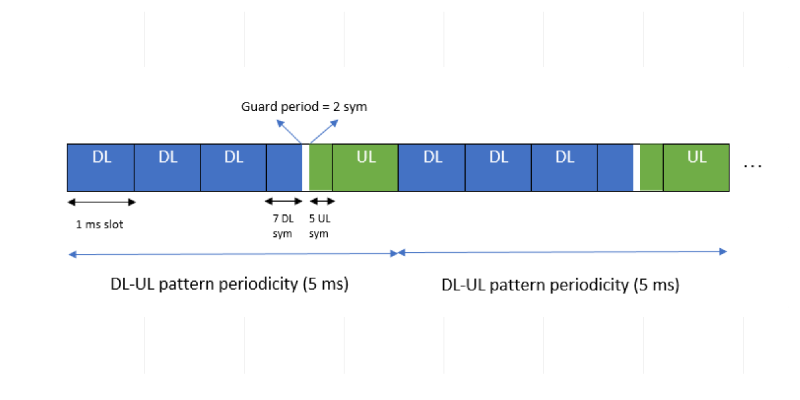

In [23]:
Plots.plot(heatmap(Images.load("images/tdd-dl-ul-pattern.png")) , size=(800, 400) , axis=false,label="Figure 1: Example of a TDD DL-UL pattern.")

| Periodicity (ms) | Number of patterns per frame |
|-|-|
| 0.5   | 20 |
| 0.625 | 16 |
|  1    | 10 |
| 1.25  |  8 |
| 2.5   |  4 |
| 5     |  2 |
| 10    |  1 |


$$ \text{ Table 2: Number of patterns per frame for different periodicities. } $$